In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
import matplotlib as mpl
from matplotlib.colors import LogNorm
from matplotlib.colors import Normalize
from scipy.interpolate import interp2d
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from labellines import labelLines
from labellines import labelLine
from PIL import Image

<ipython-input-6-773b2c66aeca>:35: UserWarning: The following kwargs were not used by contour: 'lw'
  ax.contour(z.reshape(shape_x, shape_y).transpose(), levels=levs_contour, extent=(x.min(), x.max(), y.min(), y.max()),


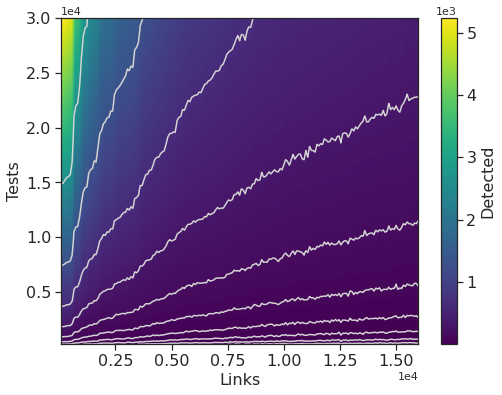

In [6]:
sns.set_theme(style="ticks")

fig,ax = plt.subplots(figsize=(8,6))

label_size = 16
abc_size = 16*1.6

name = 'ma'
betastr = '3,0'
heatmap = pd.read_csv('tests/out/' + name + '_30k_beta_' + betastr +
                        '.txt', sep='\t')
heatmap = heatmap[heatmap['links'] < 16000]
# PIVOT TABLE
x = heatmap['links'].to_numpy()
y = heatmap['tests'].to_numpy()
z = heatmap['detected'].to_numpy()

colormap = 'viridis'

# Niveles para hacer líneas de contorno blancas (en escala logaritmica)
# np.floor(np.log10(z.min())-4),
lev_exp = np.linspace(np.log10(z.min()+0.00000001), np.log10(z.max()), 12)
# np.ceil(np.log10(z.max())+4), 4)
levs = np.power(10.0, lev_exp)

lev_exp_contour = lev_exp
levs_contour = np.power(10.0, lev_exp_contour)

shape_x = len(np.unique(x))
shape_y = len(np.unique(y))

# imshow para dibujar simplemente el mapa, sin marcar contornos
ax.imshow(np.flip(z.reshape(shape_x, shape_y), 1).transpose(), extent=(x.min(), x.max(), y.min(), y.max()), aspect='auto',
            cmap=colormap, norm=Normalize(levs.min()+0.01, levs.max()))  # , norm=LogNorm(levs.min(),levs.max()))
ax.contour(z.reshape(shape_x, shape_y).transpose(), levels=levs_contour, extent=(x.min(), x.max(), y.min(), y.max()),
            norm=Normalize(levs.min()+0.01, levs.max()), colors='lightgrey', lw=2)  # , norm=LogNorm(levs.min(),levs.max()))

# COLORBAR
sm = plt.cm.ScalarMappable(cmap=colormap, norm=Normalize(vmin=min(levs), vmax=max(levs)))
#sm.set_array([])
cbar2 = fig.colorbar(sm, ax=ax)

ax.set_xlabel('Links', size=label_size)
ax.set_ylabel('Tests', size=label_size)
ax.tick_params(labelsize=label_size)
ax.ticklabel_format(axis='both', style='sci', scilimits=(0,0))

cbar2.ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
cbar2.ax.tick_params(labelsize=label_size)
cbar2.ax.set_ylabel('Detected', size=label_size)


fig.savefig('figures/figs_dec23/Fig1b.svg', bbox_inches='tight', dpi=300)

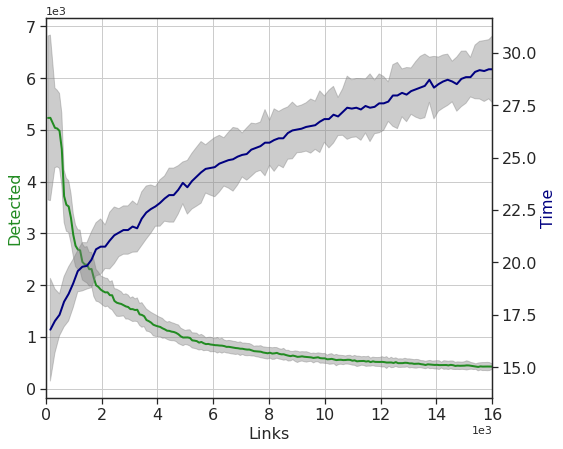

In [12]:
sns.set_theme(style="ticks")

fig,ax1 = plt.subplots(figsize=(8,7))
ax2 = ax1.twinx()
label_size = 16
abc_size = 16*1.6

name = 'ma'
betastr = '3,0'

data = pd.read_csv('tests/out/' + name + '_30k_beta_' + betastr +
                        '.txt', sep='\t')
data = data[data['tests']==30000]
sns.set_theme(style="ticks")

ax1.plot('links', 'detected', data=data, color='forestgreen', lw=2)
ax1.fill_between(x=data['links'], y1=data['detected']+ 1*data['error'], y2=data['detected']-1*data['error'], color='gray', alpha=0.4)

# ax1.set_title(name, size=16)
ax1.set_xlabel('Links', size=label_size)
ax1.set_ylabel('Detected', size=label_size, color='forestgreen')
ax1.tick_params(labelsize=label_size)
ax1.set_xlim(0, 16000)
ax1.grid('True')
ax1.ticklabel_format(axis='both', style='sci', scilimits=(3,3))

data = pd.read_csv('times/out/' + name + '_30k_beta_' + betastr +
                        '.txt', sep='\t')

ax2.plot('links', 'time', data=data, color='navy', lw=2)
ax2.fill_between(data=data, x=data['links'], y1=data['time']+data['error'], y2=data['time']-data['error'], color='gray', alpha=0.4)
# ax2.set_title(name, size=16)
ax2.set_xlabel('Links', size=label_size)
ax2.set_ylabel('Time', size=label_size, color='navy')
ax2.tick_params(labelsize=label_size)



fig.savefig('figures/figs_dec23/Fig1c.svg', bbox_inches='tight', dpi=300)

<ipython-input-8-d5ed18f9d500>:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('inferno_r')


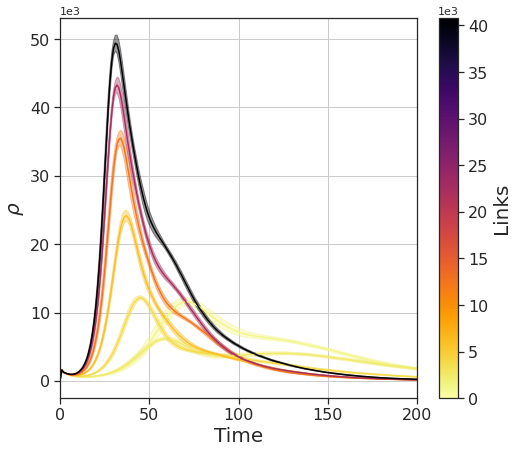

In [8]:
fig,ax = plt.subplots(figsize=(8,7))
label_size = 16
abc_size = 16*1.6

data = pd.read_csv('curves_confinement/out/trajectories/ma_beta_4,0_80k.txt', sep='\t')
data['error'] = data['error'] * np.sqrt(1)

links = data['links'].drop_duplicates()
links = links[links.isin([1237, 2474, 3711, 6185, 12371, 22269, 40826])]

colors = cm.get_cmap('inferno_r')

sns.set_theme(style="ticks")

for l in links:
    ax.plot('time', 'infected', color = colors((l)/(links.max())), data=data[data['links'] == l],
        label=l)
    ax.fill_between(x=data[data['links'] == l]['time'], y1=data[data['links'] == l]['infected']+ 2*data[data['links'] == l]['error'],
        y2=data[data['links'] == l]['infected']-2*data[data['links'] == l]['error'], color=colors((l)/(links.max())), alpha=0.4) 
sm = plt.cm.ScalarMappable(cmap=colors, norm=Normalize(0, links.max()))
cbar=fig.colorbar(sm, ax=ax)


ax.set_xlabel('Time', size=20)
ax.set_ylabel(r'$\rho$', size=20)
ax.tick_params(labelsize=16)
ax.ticklabel_format(axis='y', style='sci', scilimits=(3,3))

cbar.ax.tick_params(labelsize=16)
cbar.ax.set_ylabel('Links', size=20)
cbar.ax.ticklabel_format(axis='y', style='sci', scilimits=(3,3))

ax.grid('True')

ax.set_xlim(0, 200)

fig.savefig('figures/figs_dec23/Fig2a.svg', bbox_inches='tight', dpi=300)

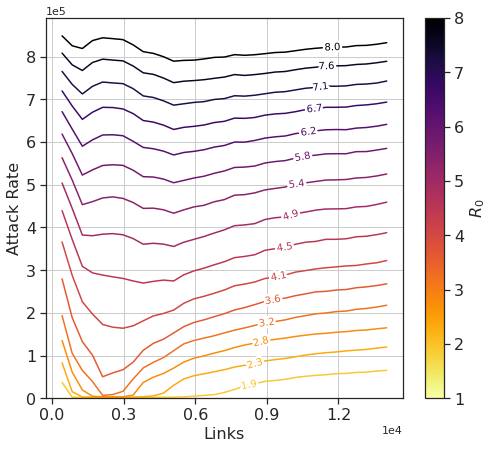

In [9]:
fig,ax1 = plt.subplots(figsize=(8,7))
label_size = 16
abc_size = 16*1.6


heatmap = pd.read_csv('confinement/out/attackRateMap/ma.txt', sep='\t', names=['beta','links', 'attackRate', 'error'])
heatmap = heatmap[heatmap['beta'].isin(heatmap['beta'].drop_duplicates()[::2])]
heatmap = heatmap.drop(heatmap[heatmap['beta'].isin([1,1.4375])].index, axis=0)

pivotTable = pd.pivot_table(data = heatmap, index = 'beta', columns = 'links', values='attackRate')

linearColor = mpl.colormaps['inferno_r']
beta_max,beta_min = 8, 1
for i,val in enumerate(heatmap['beta'].drop_duplicates()):
    links_text = 11472
    color=linearColor((val-beta_min)/(beta_max-beta_min))
    ax1.plot('links', 'attackRate', data=heatmap[heatmap['beta']==val], color=color, label=f'{val:.1f}')
    # ax1.text(links_text, heatmap[(heatmap['beta']==val) & (heatmap['links']==links_text)]['attackRate'].max(),
    #         r'$R_0$ = ' + f'{val:.2f}', color=color, fontsize=8, bbox=dict(facecolor='white', alpha=1, pad=-1), ha='center', va='center')

labelLines(plt.gca().get_lines(), zorder=2.5, xvals=(8000, 12000), outline_width=5, fontsize=10)

# COLORBAR
sm = plt.cm.ScalarMappable(cmap=linearColor, norm=Normalize(vmin=beta_min, vmax=beta_max))
#sm.set_array([])
cbar = fig.colorbar(sm, ax=ax1)

ax1.set_xlabel('Links', size=label_size)
ax1.set_ylabel('Attack Rate', size=label_size)
ax1.tick_params(labelsize=label_size)
ax1.xaxis.set_major_locator(mpl.ticker.MaxNLocator(5))
# ax1.xaxis.set_major_formatter(lambda x, pos: '{:.0f}'.format(x/1000) + 'k')
# ax1.yaxis.set_major_formatter(lambda x, pos: '{:.0f}'.format(x/1000) + 'k')
ax1.ticklabel_format(axis='both', style='sci', scilimits=(0,0))


cbar.ax.tick_params(labelsize=label_size)
cbar.ax.set_ylabel(r'$R_0$', size=label_size)

ax1.grid('True')
ax1.set_ylim(0,)

fig.savefig('figures/figs_dec23/Fig2c.svg', bbox_inches='tight', dpi=300)    

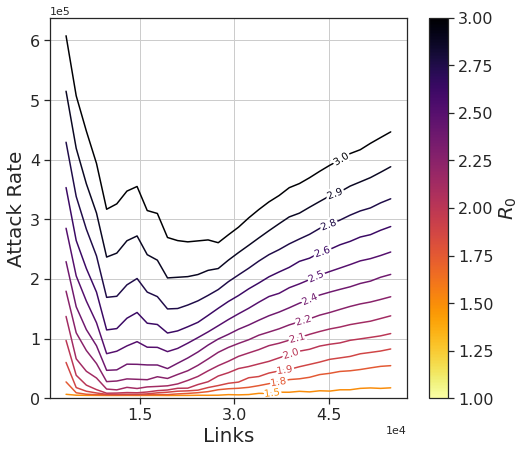

In [10]:
fig,ax = plt.subplots(figsize=(8,7))
label_size = 16
abc_size = 16*1.6

heatmap = pd.read_csv('confinement/out/attackRateMap/bogotabeta_1-3.txt', sep='\t', names=['beta','links', 'attackRate', 'error'])
heatmap = heatmap[heatmap['beta'].isin(heatmap['beta'].drop_duplicates()[::2]) & ((heatmap['beta'] > 1.7) | (heatmap['beta']==1.5))]
heatmap = heatmap.drop(heatmap[heatmap['beta'].isin([1])].index, axis=0)
# heatmap = heatmap[heatmap['beta'] < 1.5]
pivotTable = pd.pivot_table(data = heatmap, index = 'beta', columns = 'links', values='attackRate')


linearColor = mpl.colormaps['inferno_r']
beta_max,beta_min = 3, 1
for i,val in enumerate(heatmap['beta'].drop_duplicates()):
    links_text = 45203
    color=linearColor((val-beta_min)/(beta_max-beta_min))
    ax.plot('links', 'attackRate', data=heatmap[heatmap['beta']==val], color=color, label=f'{val:.1f}')
    # ax.text(links_text, heatmap[(heatmap['beta']==val) & (heatmap['links']==links_text)]['attackRate'].max(),
    #         r'$R_0$ = ' + f'{val:.2f}', color=color, fontsize=8, bbox=dict(facecolor='white', alpha=1, pad=-1), ha='center', va='center')

labelLines(ax.get_lines(), zorder=2.5, xvals=(35000, 48000), outline_width=5, fontsize=10)

# COLORBAR
sm = plt.cm.ScalarMappable(cmap=linearColor, norm=Normalize(vmin=beta_min, vmax=beta_max))
#sm.set_array([])
cbar = fig.colorbar(sm, ax=ax)

ax.set_xlabel('Links', size=20)
ax.set_ylabel('Attack Rate', size=20)
ax.tick_params(labelsize=16)
ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(5))

ax.ticklabel_format(axis='both', style='sci', scilimits=(0,0))

cbar.ax.tick_params(labelsize=16)
cbar.ax.set_ylabel(r'$R_0$', size=20)

ax.grid('True')

ax.set_ylim(0,)

fig.savefig('figures/figs_dec23/fig3a.svg', bbox_inches='tight', dpi=300)


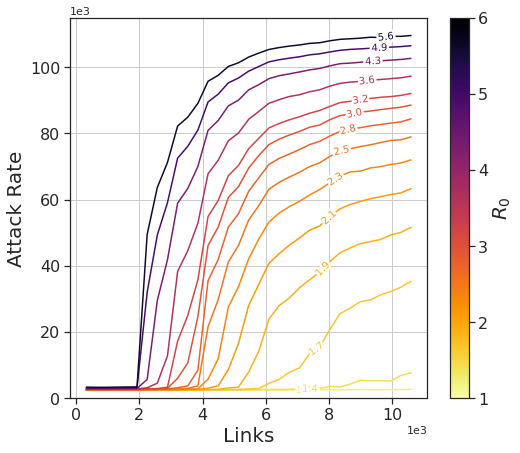

In [11]:
fig,ax1 = plt.subplots(figsize=(8,7))
label_size = 16
abc_size = 16*1.6

heatmap = pd.read_csv('confinement/out/attackRateMap/miami.txt', sep='\t', names=['beta','links', 'attackRate', 'error'])
heatmap = heatmap[heatmap['beta'] < 6]
heatmap = heatmap[heatmap['beta'].isin(heatmap['beta'].drop_duplicates()[::3]) | (heatmap['beta'] < 3.2)]
heatmap = heatmap.drop(heatmap[heatmap['beta'].isin([1])].index, axis=0)

pivotTable = pd.pivot_table(data = heatmap, index = 'beta', columns = 'links', values='attackRate')

linearColor = mpl.colormaps['inferno_r']
beta_max,beta_min = 6, 1
for i,val in enumerate(heatmap['beta'].drop_duplicates()):
    links_text = 9312
    color=linearColor((val-beta_min)/(beta_max-beta_min))
    ax1.plot('links', 'attackRate', data=heatmap[heatmap['beta']==val], color=color, label=f'{val:.1f}')
    # ax1.text(links_text, heatmap[(heatmap['beta']==val) & (heatmap['links']==links_text)]['attackRate'].max(),
    #         r'$R_0$ = ' + f'{val:.2f}', color=color, fontsize=8, bbox=dict(facecolor='white', alpha=1, pad=-1), ha='center', va='center')

labelLines(ax1.get_lines(), zorder=2.5, xvals=(7000, 10000), outline_width=5, fontsize=10)

# COLORBAR
sm = plt.cm.ScalarMappable(cmap=linearColor, norm=Normalize(vmin=beta_min, vmax=beta_max))
#sm.set_array([])
cbar = fig.colorbar(sm, ax=ax1)

ax1.set_xlabel('Links', size=20)
ax1.set_ylabel('Attack Rate', size=20)
ax1.tick_params(labelsize=16)
ax1.ticklabel_format(axis='both', style='sci', scilimits=(3,3))


cbar.ax.tick_params(labelsize=16)
cbar.ax.set_ylabel(r'$R_0$', size=20)

ax1.grid('True')
ax1.set_ylim(0,)

fig.savefig('figures/figs_dec23/fig3b.svg', bbox_inches='tight', dpi=300)

/tmp/ipykernel_28044/3608913494.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  linearColor = mpl.cm.get_cmap('inferno_r')


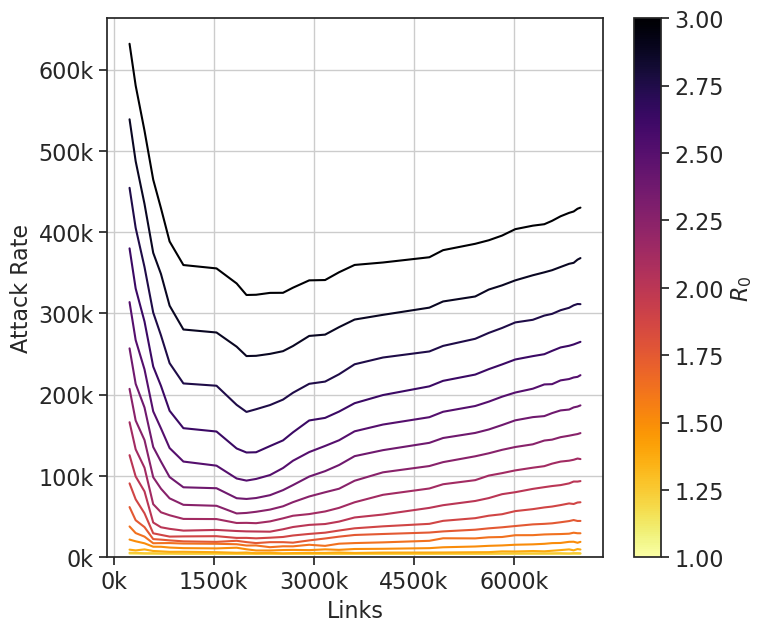

In [20]:
fig,ax1 = plt.subplots(figsize=(8,7))
label_size = 16
abc_size = 16*1.6

heatmap = pd.read_csv('public_transport/confinement/out/attackRateMap/bogota_transport_beta_1-3.txt', sep='\t', names=['beta','links', 'attackRate', 'error'])
heatmap = heatmap[heatmap['beta'].isin(heatmap['beta'].drop_duplicates()[::2])]
heatmap = heatmap.drop(heatmap[heatmap['beta'].isin([1])].index, axis=0)
pivotTable = pd.pivot_table(data = heatmap, index = 'beta', columns = 'links', values='attackRate')


linearColor = mpl.cm.get_cmap('inferno_r')
beta_max,beta_min = 3, 1
for i,val in enumerate(heatmap['beta'].drop_duplicates()):
    links_text = 5622490
    color=linearColor((val-beta_min)/(beta_max-beta_min))
    ax1.plot('links', 'attackRate', data=heatmap[heatmap['beta']==val], color=color)
    # ax1.text(links_text, heatmap[(heatmap['beta']==val) & (heatmap['links']==links_text)]['attackRate'].max(),
    #         r'$R_0$ = ' + f'{val:.2f}', color=color, fontsize=8, bbox=dict(facecolor='white', alpha=1, pad=-1), ha='center', va='center')
# COLORBAR
sm = plt.cm.ScalarMappable(cmap=linearColor, norm=Normalize(vmin=beta_min, vmax=beta_max))
#sm.set_array([])
cbar = fig.colorbar(sm, ax=ax1)

ax1.set_xlabel('Links', size=label_size)
ax1.set_ylabel('Attack Rate', size=label_size)
ax1.tick_params(labelsize=16)
ax1.xaxis.set_major_formatter(lambda x, pos: '{:.0f}'.format(x/1000) + 'k')
ax1.xaxis.set_major_locator(mpl.ticker.MaxNLocator(5))
ax1.yaxis.set_major_formatter(lambda x, pos: '{:.0f}'.format(x/1000) + 'k')

cbar.ax.tick_params(labelsize=label_size)
cbar.ax.set_ylabel(r'$R_0$', size=label_size)

ax1.grid('True')
ax1.set_ylim(0,)

fig.savefig('figures/presentation/Fig7attackRateBogotaTransport.pdf', bbox_inches='tight', dpi=300)